<h1>3 Convolution Layers</h1>

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [9]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Layer 1
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))

#Batch Normalization
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(64, (3, 3),activation='relu'))

#Batch Normalization
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Dropout
model.add(Dropout(0.75))

#Flatten
model.add(Flatten())

#FC
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.8222 - acc: 0.7366 - val_loss: 0.1412 - val_acc: 0.9565
Epoch 2/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.3220 - acc: 0.9001 - val_loss: 0.0939 - val_acc: 0.9713
Epoch 3/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.2397 - acc: 0.9273 - val_loss: 0.0870 - val_acc: 0.9736
Epoch 4/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.1962 - acc: 0.9420 - val_loss: 0.0731 - val_acc: 0.9779
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.1693 - acc: 0.9488 - val_loss: 0.0699 - val_acc: 0.9790
Epoch 6/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.1563 - acc: 0.9541 - val_loss: 0.0808 - val_acc: 0.9748
Epoch 7/12
60000/60000 [========================

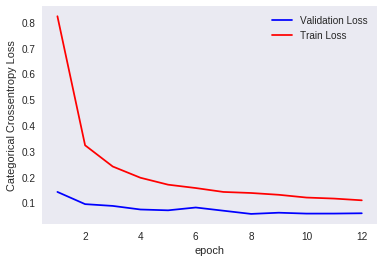

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>5 Convolutional Layers</h1>

In [11]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

# Layer 1
model.add(Conv2D(32, (5, 5), input_shape=input_shape,activation='relu'))

# Layer 2
model.add(Conv2D(32, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Layer 3
model.add(Conv2D(64, (3, 3),activation='relu'))


# Layer 4
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Layer 5
model.add(Conv2D(120, (1, 1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.6062 - acc: 0.8021 - val_loss: 0.0963 - val_acc: 0.9680
Epoch 2/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.1219 - acc: 0.9660 - val_loss: 0.0784 - val_acc: 0.9772
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0826 - acc: 0.9774 - val_loss: 0.0595 - val_acc: 0.9830
Epoch 4/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0646 - acc: 0.9820 - val_loss: 0.0435 - val_acc: 0.9882
Epoch 5/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0544 - acc: 0.9853 - val_loss: 0.0456 - val_acc: 0.9871
Epoch 6/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0454 - acc: 0.9875 - val_loss: 0.0371 - val_acc: 0.9907
Epoch 7/12
60000/60000 [========================

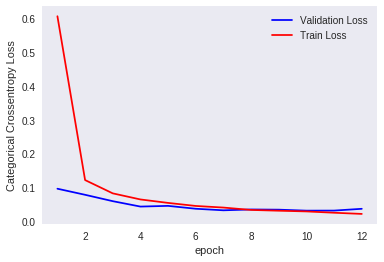

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1> 7 Convolutional Layers</h1>

In [16]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

# Layer 1
model.add(Conv2D(32, (5, 5), input_shape=input_shape,activation='relu'))

# Layer 2
model.add(Conv2D(32, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Layer 3
model.add(Conv2D(32, (3, 3),activation='relu'))


# Layer 4
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))



# Layer 5
model.add(Conv2D(64, (1, 1),activation='relu'))


# Layer 6
model.add(Conv2D(64, (1, 1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Layer 7
model.add(Conv2D(120, (1, 1),activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.8259 - acc: 0.7213 - val_loss: 0.1343 - val_acc: 0.9586
Epoch 2/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.1369 - acc: 0.9625 - val_loss: 0.0707 - val_acc: 0.9789
Epoch 3/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0867 - acc: 0.9769 - val_loss: 0.0702 - val_acc: 0.9792
Epoch 4/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0670 - acc: 0.9818 - val_loss: 0.0423 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0537 - acc: 0.9858 - val_loss: 0.0383 - val_acc: 0.9895
Epoch 6/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0463 - acc: 0.9877 - val_loss: 0.0372 - val_acc: 0.9894
Epoch 7/12
60000/60000 [========================

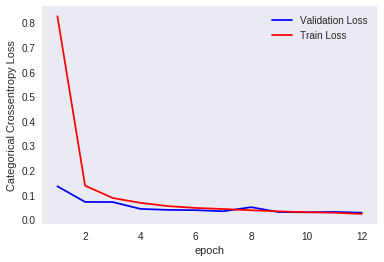

In [17]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>Conclusion</h1>

In [19]:
from prettytable import PrettyTable
t = PrettyTable()
t.field_names = ['Model', 'Test_Accuracy']
t.add_row(['CNN with 3 layers','0.983'])
t.add_row(['CNN with 5 layers','0.991'])
t.add_row(['CNN with 7 layers','0.993'])

print(t)


+-------------------+---------------+
|       Model       | Test_Accuracy |
+-------------------+---------------+
| CNN with 3 layers |     0.983     |
| CNN with 5 layers |     0.991     |
| CNN with 7 layers |     0.993     |
+-------------------+---------------+
